# Interpolations

* Data points are pairing between coordinates, $x_j\in\mathbb{R}^d$ and values $y_j$. 
* The values can come from some function and it's derivatives
* **Interpolation** is used to approximate the assumed "underlying function", denoted here by $f$,

* an interpolation scheme produces an **interpolant** $f_{int}(x)$ which is used to approximate $f$.

* Most commonly in this class,  $y_j$ only corresponds to $f(x_j)$, then the **interpolant** $f_{int}$ has to agree with $y_j$:
$$f_{int}(x_j)=y_j,~~~j=0,1,2,3,\cdots,N$$

* If some of $y_j$ corresponds to the derivative of $f$, we have a **Hermite interpolation** problem.

#### Special example: Taylor's expansion

Data: $(x_0, f(x_0), (x_0, f^\prime(x_0)), (x_0, f^\prime(x_0))$

* Taylor's series constructs a polynomial that interpolate the data. E.g. quadratic interpolant:

$$ f_{int}(x) = f(x_0) + (x-x_0)f^\prime(x_0) + \frac{(x-x_0)^2}{2}f^{\prime\prime}(x_0) $$

## General setup

* Basis functions $$\phi_0(x), \phi_1(x),\cdots,\phi_N(x)$$

* The interpolant as a linear combination of the basis function 
$$f_{int}(x):= a_0 \phi_0(x)+a_1 \phi_1(x)+\cdots+a_N\phi(x)$$

* Consider interpolating the values of $f$, we arrive at the linear system to solve:

$$\left(\begin{array}{cccc}
\phi_{0}(x_{0}) & \phi_{1}(x_{0}) & \cdots & \phi_{N}(x_{0})\\
\phi_{0}(x_{1}) & \phi_{1}(x_{1})\\
\vdots & \vdots\\
\phi_{0}(x_{N}) & \phi_{1}(x_{N}) & \cdots & \phi_{N}(x_{N})
\end{array}\right)\left(\begin{array}{c}
a_{0}\\
a_{1}\\
\vdots\\
a_{N}
\end{array}\right)=\left(\begin{array}{c}
y_{0}\\
y_{1}\\
\vdots\\
y_{N}
\end{array}\right)$$


### Does interpolation of noisy data make sense?

### Degree of polynomials and number of data points

Interpolating many ($M$) data points by polynomial of degress $N$ where 

* $M>N-1$ is an *over-determined* problem (more equations than the number of unknowns). In general, one cannot find solution for such problems.
    * Consider: least square fitting problem

* $M<N-1$ is an *under-determined* problem. There could be no solution or infinite number of solutions.
    * Consider interpolation with additional constraints on the interpolant. For example, find an interpolant that has the smallest derivative in the $L^2$ norm.


## Special approaches

### Lagrange and Newton interpolation schemes -- *BUILD basis functions around data points*

* Lagrange polynomials:  $\phi_j(x)$ created so that $\Phi$ is a diagonal matrix: $\Phi=diag( y_j)$
* Newton's polynomials:  $\phi_{j+1}(x)$ is built on top of $\phi_j(x)$, and $\Phi$ is a triangular matrix (so it is trivial to invert).

### Interpolation using orthogonal polynomials

* "orthogonality" is defined by some notion of inner product.

* Examples of orthogonal polynomials: **Legendre polynomials, Chebyshev polynomials**; they are *orthogonal* under different inner products.

### Interpolation using trigonometric functions

* **Fast Fourier Transform (FFT)** is used to invert the matrix


## Dimension-by-dimension interpolation in higher dimensions

* E.g. bilinear interpolation on a square domian in two dimensions

In [1]:
using Plots #documentation: http://docs.juliaplots.org/latest/tutorial/ 

# Lagrange polynomials

In [1]:
# Given data points coordinates, x, evaluate the ith Lagrange basis polynomial at z
function LagrangePoly(x, i, z)
    
    L=zeros(size(z))
    
    for j=1:length(z)
        L[j]=prod( (z[j]-x[1:i-1])./(x[i]-x[1:i-1]))*prod( (z[j]-x[i+1:end])./(x[i]-x[i+1:end]))
    end
    
    return L
end

LagrangePoly (generic function with 1 method)

In [2]:
x = [0.0 0.25 0.5 0.78 1.01]

y = exp.(x)

z = -0.15:0.02:1.15

L1=LagrangePoly(x,1, z)
L2=LagrangePoly(x,2, z)
L3=LagrangePoly(x,3, z)
L4=LagrangePoly(x,4, z)
L5=LagrangePoly(x,5, z)


plot(z, [L1, L2, L5])

LoadError: [91mUndefVarError: plot not defined[39m

In [3]:
f(x)= sin(2x) 

#generate data
x = [0.0 0.25 0.5 0.78 1.01]
y = f.(x)

z = -1.0:0.02:2.5

L1=LagrangePoly(x,1, z)
L2=LagrangePoly(x,2, z)
L3=LagrangePoly(x,3, z)
L4=LagrangePoly(x,4, z)
L5=LagrangePoly(x,5, z)

f_interp=y[1]*L1+y[2]*L2+y[3]*L3+y[4]*L4+y[5]*L5

p1=plot(x,y, seriestype=:scatter)
p2=plot(z,[f_interp f.(z)], label=["f_interp" "f"])
    
plot(p1,p2)

LoadError: [91mUndefVarError: plot not defined[39m

### Verify that the interpolant is exact if the data come from a polynomial of degree $\le N$


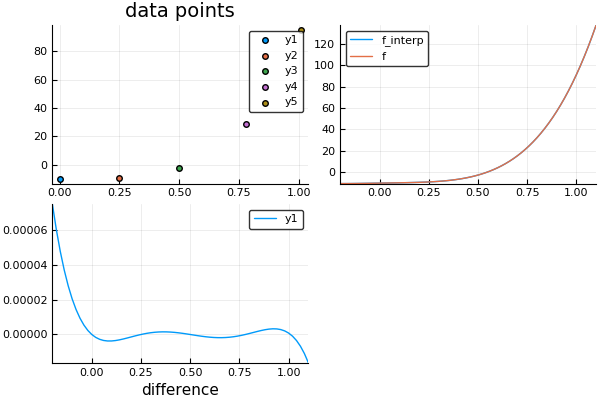

In [5]:
f(x)= 1e-3*x^5+100.0*x^4-2.0*x^3+3.0*x-10.0 

#generate data
x = [0.0 0.25 0.5 0.78 1.01]
y = f.(x)

z = -.2:0.02:1.1

L1=LagrangePoly(x,y,1, z)
L2=LagrangePoly(x,y,2, z)
L3=LagrangePoly(x,y,3, z)
L4=LagrangePoly(x,y,4, z)
L5=LagrangePoly(x,y,5, z)

f_interp=y[1]*L1+y[2]*L2+y[3]*L3+y[4]*L4+y[5]*L5

p1=plot(x,y, seriestype=:scatter, title="data points")
p2=plot(z,[f_interp f.(z)], label=["f_interp" "f"])
p3=plot(z,[f_interp-f.(z)], xlabel="difference")

    
plot(p1,p2,p3)

### Runge phenomenon

* Interpolation using high order polynomials are not useful in general

* Interpolate at judiciously chosen nodes in an interval; e.g. the roots of Chebyshev's polynomial, appropriately scaled and translated



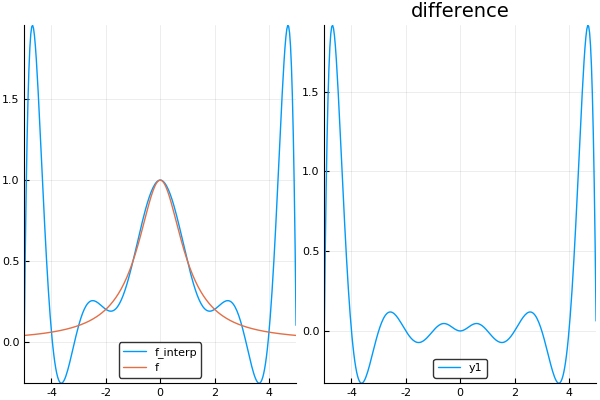

In [6]:
f(x)= 1/(1.+x^2)

#generate data
N=10.0
x = -5.0:10.0/N:5.0

y = f.(x)

N=100
z = -5-0.000:10.2/(N*3):5+0.000

#add noise
y=y+0.0*rand(size(y))

L=zeros(length(z), length(x))
for m=1:length(y)  
    L[:,m]=LagrangePoly(x,y,m, z)
end

f_interp=L*y

p1=plot(z, [f_interp f.(z)], label=["f_interp" "f"])
p2=plot(z, f_interp-f.(z),title="difference")

plot(p1,p2)

# Newton interpolation

$$\phi_0(x):=1,$$
$$\phi_k(x):=\prod_{j=0}^{k-1}(x-x_j)$$

$$\left(\begin{array}{cccc}
1 & 0 & 0 & \cdots\\
1 & (x_{1}-x_0)& 0\\
\vdots & \vdots\\
1 & (x_{N}-x_0) & \cdots & \phi_{N}(x_{N})
\end{array}\right)\left(\begin{array}{c}
a_{0}\\
a_{1}\\
\vdots\\
a_{N}
\end{array}\right)=\left(\begin{array}{c}
y_{0}\\
y_{1}\\
\vdots\\
y_{N}
\end{array}\right)$$

This leads to recursively defined interpolants:

$$P_k(x) := a_0 +a_1\phi_1(x)+\cdots+a_k\phi_k(x) = P_{k-1}(x)+a_k\phi_k(x),$$
and 
$$ a_0=f(x_0),$$
$$a_k=f[x_i,x_{i+1},\ldots,x_{i+k})]:=\frac{f[x_{i+1},\ldots,x_{i+k}]-f[x_{i},\ldots,x_{i+k-1}]}{x_{i+k}-x_i}$$

### Important facts

* The order of the data points makes no difference.
* **Convenient expression for the interpolation error**: 
    If we add an *arbitrary* new data point $(x, f(x))$, the new interpolant, evaluated at the new data point, is related to the existing interpolant $f_{int}^N$ using $N$ data points is exactly:
    $$ f(x) = f_{int}^N(x)+ f[x_0,x_1,\cdots,x_N, x]\prod_{j=0}^N (x-x_j). $$
    In other words, the error in using $f_{int}^N(x)$ to approximate $f(x)$ is precisely
    $$  e_{int}^N:=f(x) - f_{int}^N(x) \equiv f[x_0,x_1,\cdots,x_N, x]\prod_{j=0}^N (x-x_j). $$
    


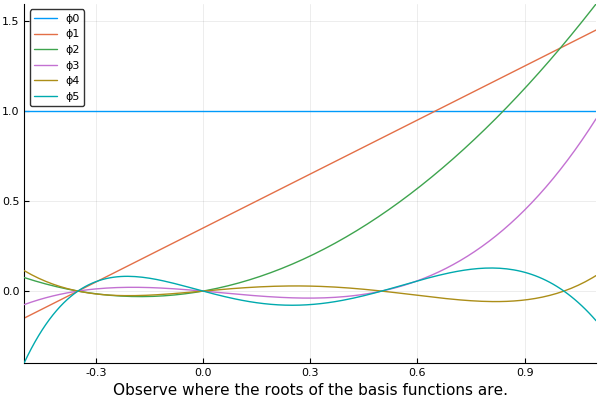

In [9]:
f(x)= 1e2*x^5+100.0*x^4-2.0*x^3+3.0*x-10.0 

#generate data
x = [-0.35 0.0 0.5 1.01 3.01]
y = f.(x)

z = -.5:0.01:1.1

#Evaluating Newton's polynomials at z
ϕ0=ones(size(z))
ϕ1=(z.-x[1])
ϕ2=ϕ1.*(z.-x[2])
ϕ3=ϕ2.*(z.-x[3])
ϕ4=ϕ3.*(z.-x[4])
ϕ5=ϕ4.*(z.-x[5])

#interpolant of different orders, built successively

a0=f(x[1])
P0=a0*ϕ0

#computing the divided differences
a1   =(f(x[2])-f(x[1]))/(x[2]-x[1]) # f[x0, x1],  x0=x[1], x1=x[2]
a1p  =(f(x[3])-f(x[2]))/(x[3]-x[2]) # f[x1, x2]
a1pp =(f(x[4])-f(x[3]))/(x[4]-x[3]) # f[x3, x2]
a1ppp=(f(x[5])-f(x[4]))/(x[5]-x[4])

P1=P0+ a1*ϕ1

#computing the divided differences
a2  =(a1p -a1 )/(x[3]-x[1])  # f[x0,x1,x2]:= (f[x2,x1]-f[x1,x0])/(x2-x0)
a2p =(a1pp-a1p)/(x[4]-x[2])  # f[x1,x2,x3]:= (f[x3,x2]-f[x2,x1])/(x3-x1)
a2pp=(a1ppp-a1pp)/(x[5]-x[3])

P2=P1+ a2*ϕ2

#computing the vided differences
a3 = (a2p-a2)/(x[4]-x[1]) #f[x0,x1,x2,x3]:= 
a3p= (a2pp-a2p)/(x[5]-x[2])

P3=P2+ a3*ϕ3

#
a4 = (a3p-a3)/(x[5]-x[1])  #f[x0,x1,x2,x3,x4]

P4 = P3+a4*ϕ4

basisfns= plot(z, [ϕ0 ϕ1 ϕ2 ϕ3 ϕ4 ϕ5], 
    label=["ϕ0" "ϕ1" "ϕ2" "ϕ3" "ϕ4" "ϕ5"], 
    xlabel="Observe where the roots of the basis functions are.")


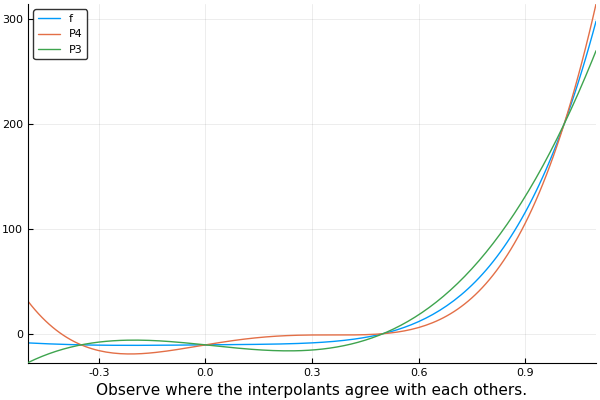

In [10]:
interps = plot(z, [f.(z) P4 P3], 
    label=["f" "P4" "P3"], 
    xlabel="Observe where the interpolants agree with each others.")

### More general code for building divided differences for use in the Newton interpolation scheme

In [20]:
#computes the divided differences for interpolation of the data (x,f)
#D is a NxN matrix, where N=length(x)=length(f)
function NewtonInterpTable!(D::Array{Float64,2}, x, f)

  n=length(x)-1
  for i=1:n+1
        @inbounds D[i,1]  =f[i]
    for j=1:i-1
            @inbounds D[i,j+1]= (D[i,j]-D[i-1,j])/(x[i]-x[i-j])
    end
  end

end

#computes the divided differences for interpolation of the data (x,f)
#D is a Nx1 matrix, where N=length(x)=length(f)
function NewtonInterpCoeffs!(D, x, f)
    
    n=length(x)

    for i=1:n
        @inbounds D[i]  =f[i] 
    end

    for j=2:n
        for i=n:-1:j
            @inbounds D[i]= (D[i]-D[i-1])/(x[i]-x[i-j+1])
        end
    end

end

#coeffs[] stores the divided differences of f: coeffs[1]=f[1], coeffs[2]=f[ x[1], x[2] ], etc.
function NewtonInterp(x,coeffs, z)
    n=length(x)-1
    
    f=zeros(size(z))
    @inbounds f.=coeffs[n+1]
    
    #notice that the summation goes "backward" from high order divided differences to lower order ones
    for k=1:length(z)
    for i=n:-1:1
        @inbounds f[k]= f[k]*(z[k]-x[i])+coeffs[i]
    end
    end
    
    return f
end

NewtonInterp (generic function with 1 method)


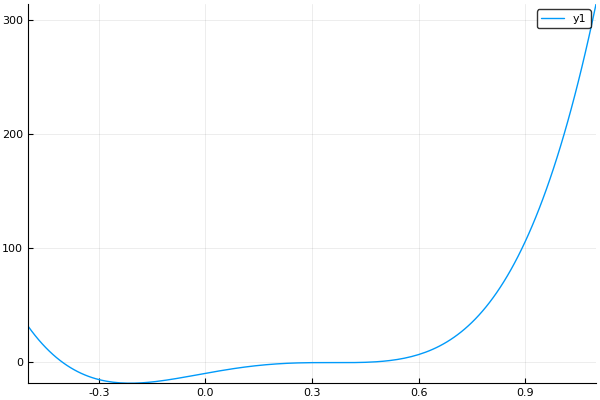

In [22]:
x = [-0.35 0.0 0.5 1.01 3.01]
y = f.(x)

z = -.5:0.01:1.1

D=copy(y)

NewtonInterpCoeffs!(D, x, y)

fint = NewtonInterp(x, D, z)
plot(z,fint)

# Multidimensional inteprolation by radial basis functions

Let $x_0, x_1, \cdots, x_N\in\mathbb{R}^m$ and 
$y_0,y_1,\cdots,y_N\in\mathbb R$ be the data points to be interpolated.

We consider "radially symmetric" functions such as Gaussians $exp(-\sigma |x|^2)$ as our "basis functions.

More precisely, we set the basis functions to be
$$\phi_j(x) := e^{-\sigma |x-x_j|^2},~~~j=0,1,\cdots,N$$

# Interpolating data *statistically*